In [3]:
'''
IC272 DSIII
Assignment 7

Shubham Shukla
B20168 
Branch : CSE 
Contact No : 8317012277

'''

# importing the important modules/packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import numpy as np
import scipy as sp
from scipy import spatial
from sklearn import metrics

# Reading the csv data
df = pd.read_csv("Iris.csv")

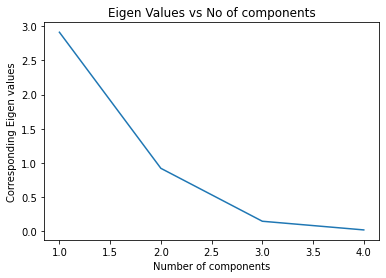

In [4]:

# question 1

# making object for doing pca for 2 components
pca = PCA(n_components = 2);

# Reducing our data by applying pca
Red_data = pd.DataFrame(pca.fit_transform(df.iloc[:, :4]), columns = ["e1", "e2"]);

# making correlation dataframe
corr_data = df.corr();

# making correlation dataframe to numpy 2d array
corr_data = corr_data.to_numpy();

# using correlation above made array finding eigen values and it's corresponding eigen vectors
eig_values, eig_vectors = np.linalg.eig(corr_data)

# plotting eigen values
plt.plot([1,2,3,4], eig_values)
plt.xlabel("Number of components")
plt.ylabel("Corresponding Eigen values")
plt.title("Eigen Values vs No of components")
plt.show()


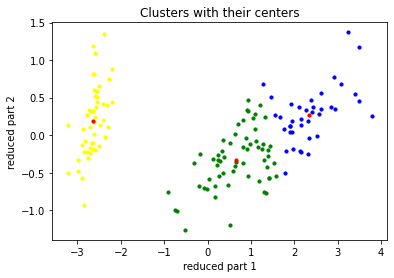

the distortion measure is :  63.874
the purity score for k = 3 is :  0.887


In [9]:
# question 2


# part(a)

# this question is given on k-means clustering
# Let's make an object of the kmeans wrt our requirement

k_mean = KMeans(n_clusters = 3, random_state = 42).fit(Red_data)

# let's take labels for each point
labels = k_mean.labels_

# labeling those classes with their points
Red_data['class'] = np.array(labels)

# grouping data according to class
groups = Red_data.groupby('class')

# getting data for each specific class
class_0 = groups.get_group(0)
class_1 = groups.get_group(1)
class_2 = groups.get_group(2)

# Let's take Coordinates of cluster centers
coor_centers = k_mean.cluster_centers_
x_centers = [coor_centers[i][0] for i in range(3)]
y_centers = [coor_centers[i][1] for i in range(3)]

# let's draw scatter for the class with their centers
plt.scatter(class_0['e1'].to_numpy(), class_0['e2'].to_numpy(),s = 10,  color = 'blue')
plt.scatter(class_1['e1'].to_numpy(), class_1['e2'].to_numpy(),s = 10,  color = 'yellow')
plt.scatter(class_2['e1'].to_numpy(), class_2['e2'].to_numpy(),s = 10,  color = 'green')
plt.scatter(x_centers, y_centers, s = 10,  color = 'red')
plt.title("Clusters with their centers")
plt.xlabel("reduced part 1")
plt.ylabel("reduced part 2")
plt.show()

# part(b)

print("the distortion measure is : ", round(k_mean.inertia_, 3))

# part(c)

# creating a function to find purity score
def purity_score(true_val, pred_val):
    
    # computing confision matrix
    confusion_matrix = metrics.cluster.contingency_matrix(true_val, pred_val)
    
    return np.sum(np.amax(confusion_matrix, axis = 0)) / np.sum(confusion_matrix)

# printing the output of purity score
print("the purity score for k = 3 is : ", round(purity_score(df['Species'], labels), 3))


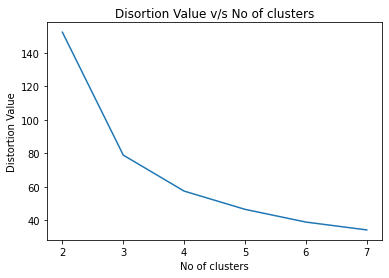

purity Score for [2, 3, 4, 5, 6, 7] is :  [0.667, 0.893, 0.84, 0.907, 0.907, 0.96]


In [10]:

# question 3

# creating array which will contain for which 
# no of clusters we have to find distortion and purity
x_val=[2,3,4,5,6,7]

# we will store distortion here
y_distortion=[]

# and will store purity here
y_purity=[]

# creating a function which will append 
# the distortion value and purity value for given no of cluster to the declared array
def K_Means(no_of_clusters):
    k_means = KMeans(n_clusters=no_of_clusters).fit(df.iloc[:, :4])
    labels=k_means.labels_
    y_distortion.append(k_means.inertia_)
    y_purity.append(round (purity_score(df['Species'],labels), 3))
    
for i in x_val :
    K_Means(i)

# Ploting distortion value for different no of clusters
plt.plot(x_val,y_distortion)
plt.xlabel("No of clusters")
plt.ylabel("Distortion Value")
plt.title("Disortion Value v/s No of clusters")
plt.show()

# Printing the purity score corresponding to the cluster counts
print(f"purity Score for {x_val} is : ",y_purity)

# on seeing the graph we can see that the optimum value by elbow method is 5

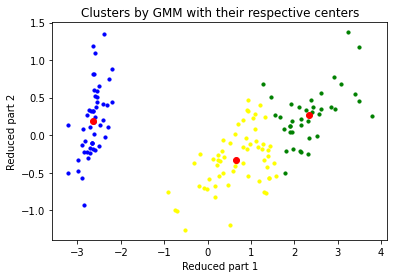

Total data log likelihood for 3 clusters using GMM is :  3.969
Purity Score for 3 clusters using GMM is :  0.887


In [18]:

# question 4

# Clustering out Reduced data using GMM
gmm = GaussianMixture(n_components=3, random_state=0).fit(Red_data)
Red_data['class']=gmm.predict(Red_data)

# Again as above grouping data by class 
groupGmm=Red_data.groupby('class')

# getting each group data
classGmm_0=groupGmm.get_group(0)
classGmm_1=groupGmm.get_group(1)
classGmm_2=groupGmm.get_group(2)

# taking centers of the new clusters
centerGmm=gmm.means_
x_centerGmm=[centerGmm[i][0] for i in range(len(centerGmm))]
y_centerGmm=[centerGmm[i][1] for i in range(len(centerGmm))]

#Ploting clusters now with their centers
plt.scatter(classGmm_0['e1'].to_numpy(),classGmm_0['e2'].to_numpy(), s = 10,color='blue')
plt.scatter(classGmm_1['e1'].to_numpy(),classGmm_1['e2'].to_numpy(), s = 10, color='yellow')
plt.scatter(classGmm_2['e1'].to_numpy(),classGmm_2['e2'].to_numpy(), s = 10, color='green')
plt.scatter(x_centerGmm,y_centerGmm,color='red')
plt.xlabel("Reduced part 1")
plt.ylabel("Reduced part 2")
plt.title("Clusters by GMM with their respective centers")
plt.show()

# part(b)

# using the builtin functions for calculating the total data log likelihood 
print("Total data log likelihood for 3 clusters using GMM is : ", round(gmm.score(Red_data), 3))

# part(c)

# using above made function purity score let's calculate the purity score for the data 
print("Purity Score for 3 clusters using GMM is : ", round(purity_score(df['Species'], gmm.predict(Red_data)), 3))

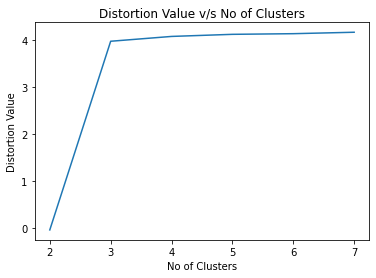

Purity Score for clusters [2 3 4 5 6 7] are respectively :  [0.667, 0.887, 0.887, 0.887, 0.887, 0.96]


In [21]:
# question 5

# let's create first array to store the distortion value and purity score
distortion=[]
purity=[]

# let's create an np array which will contains the no of clusters required 
x_distortion=np.arange(2,8)

# Creating a function which will append distortion value with 
# purity score to the respective array for passed no of clusters

def append_data(cluster):
    gmm = GaussianMixture(n_components=cluster, random_state=42).fit(Red_data)
    distortion.append(gmm.score(Red_data))
    gmm.predict(Red_data)
    purity.append(round(purity_score(df['Species'],gmm.predict(Red_data)), 3))
    
# calling the funciton for stored required no of clusters
for i in x_distortion: 
    append_data(i)
    
# Ploting the distortion measure for the required components 
plt.plot(x_distortion,distortion)
plt.xlabel("No of Clusters")
plt.ylabel("Distortion Value")
plt.title("Distortion Value v/s No of Clusters")
plt.show()

# Printing different values of purity score for different values of K
print(f"Purity Score for clusters {x_distortion} are respectively : ",purity)

for eps = 1 and min samples = 4


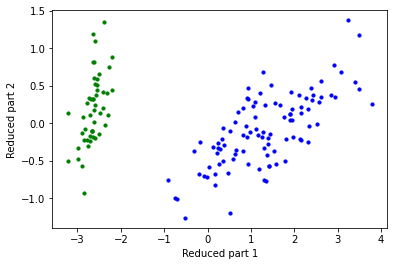

for eps = 1 and min samples = 10


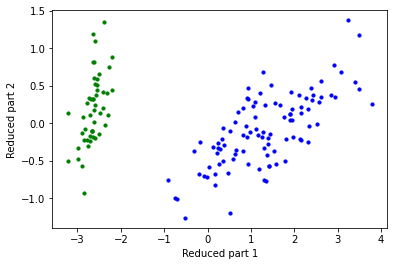

for eps = 5 and min samples = 4


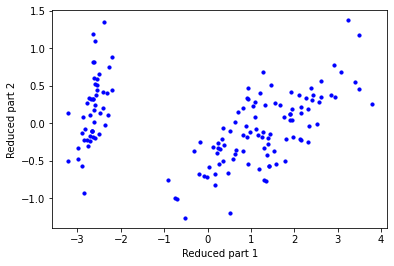

for eps = 5 and min samples = 10


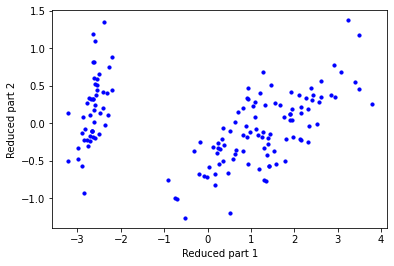

Purity score for eps = 1 and min sample = [4, 10] are :  [0.667, 0.887]
Purity score for eps = 5 and min sample = [4, 10] are :  [0.887, 0.887]


In [23]:
# question 6

# creating an array which will store the purity score
purityDB=[]

# Making a function which will do the clustering of data using DBSCAN
# and also append the purity score to the above made array

def DBSCAN_purity(eps_, min_samples_):
    # making an DBSCAN object to acc to our requirement
    cluster = DBSCAN(eps= eps_, min_samples= min_samples_).fit(Red_data)
    
    # storing the labels corresponding to the each data points
    labels = cluster.labels_
    Red_data['class'] = labels
    
     # appending the purity score
    purity.append(round(purity_score(df['Species'],Red_data['class']),3))
    
    print(f"for eps = {eps_} and min samples = {min_samples_}")
    
    if(eps_ == 1):
        # grouping the data acc to class
        groups=Red_data.groupby('class')

        # storing that data 
        classDB_0=groups.get_group(0)
        classDB_1=groups.get_group(1)
        
        # plotting the scattered data 
        plt.scatter(classDB_0['e1'].to_numpy(),classDB_0['e2'].to_numpy(), s=10,color='green')
        plt.scatter(classDB_1['e1'].to_numpy(),classDB_1['e2'].to_numpy(), s=10,color='blue')
        plt.xlabel("Reduced part 1")
        plt.ylabel("Reduced part 2")
        plt.show() 
        
    if(eps_ == 5):
        # plotting the scattered data 
        plt.scatter(Red_data['e1'],Red_data['e2'],color='blue', s = 10)
        plt.xlabel("Reduced part 1")
        plt.ylabel("Reduced part 2")
        plt.show()

    
# since there is very less data so we can call it manually
DBSCAN_purity(1,4);DBSCAN_purity(1,10) # calling for eps = 1
DBSCAN_purity(5,4);DBSCAN_purity(5,10) # calling for eps = 5

# Printing purity score for different no of 
print("Purity score for eps = 1 and min sample = [4, 10] are : ",purity[:2])
print("Purity score for eps = 5 and min sample = [4, 10] are : ", purity[2:4])
